<a href="https://colab.research.google.com/github/romildojuliano/Silent-Spell-Desktop/blob/HandsClassifier/SilentSpell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data.csv')
df = df.sample(frac=1)
df.head()

,0-1-2,1-2-3,2-3-4,5-6-7,6-7-8,9-10-11,10-11-12,13-14-15,14-15-16,17-18-19,18-19-20,8-0-20,12-0-20,4-0-16,16-0-20,label
2697,2.645127,2.012749,2.003420,1.382568,2.742032,1.277105,2.717699,0.946895,2.757852,0.877779,2.602651,0.705201,0.469234,0.438160,0.231247,E
1245,2.418561,2.720068,3.008229,1.697539,2.588193,1.374465,2.581013,1.053421,2.700944,1.166170,2.608954,0.592942,0.447723,0.782932,0.232851,A
2865,2.563431,1.963736,2.099116,1.155496,2.908457,1.097142,2.830458,0.691255,2.925941,0.675542,2.768274,0.748472,0.513122,0.403219,0.249877,E
1834,2.355306,2.655700,3.003464,2.603923,2.727462,2.529655,2.736999,2.498270,2.780759,2.772132,2.841409,0.488041,0.338829,0.402728,0.191589,C
3486,2.587854,2.877952,2.671544,1.907604,2.381778,2.915944,2.735547,1.901617,2.487481,2.505343,2.662712,0.677521,0.378219,0.598643,0.194917,D


In [ ]:
df.describe()

,0-1-2,1-2-3,2-3-4,5-6-7,6-7-8,9-10-11,10-11-12,13-14-15,14-15-16,17-18-19,18-19-20,8-0-20,12-0-20,4-0-16,16-0-20
count,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000
mean,2.589016,2.469584,2.635556,2.253225,2.817780,2.068810,2.749957,1.800182,2.743893,2.068542,2.758112,0.534161,0.381993,0.430899,0.211301
std,0.176478,0.356725,0.319964,0.819435,0.233030,0.804828,0.275102,0.815521,0.212371,0.743158,0.243960,0.191727,0.164210,0.237209,0.120360
min,2.001391,1.716979,1.753597,0.104630,0.339322,0.142311,0.241512,0.108988,0.652733,0.195699,1.375064,0.022635,0.010258,0.007409,0.010589
25%,2.474916,2.145284,2.363732,1.526987,2.654851,1.319671,2.598166,1.123262,2.616888,1.382997,2.608954,0.352700,0.240031,0.238058,0.139350
50%,2.593947,2.571977,2.693682,2.609872,2.844437,2.209607,2.762298,1.689520,2.766785,2.131355,2.764218,0.553787,0.378958,0.393905,0.187413
75%,2.698524,2.751225,2.915396,2.965841,3.024205,2.851617,2.977408,2.537516,2.901238,2.816283,2.946232,0.682219,0.473314,0.591100,0.233711
max,3.123327,3.133555,3.135686,3.133189,3.140310,3.137946,3.133852,3.138871,3.129297,3.131517,3.138709,1.135739,0.880852,1.119861,0.827209


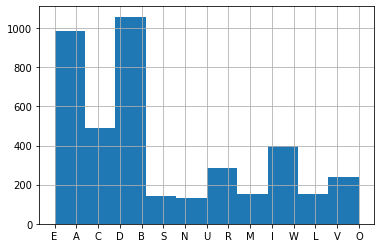

In [ ]:
df['label'].hist()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_df = df.drop('label', axis=1)
y_df = df['label']
Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, y_df, test_size=0.2, random_state=1)


In [ ]:
!pip install pyngrok --quiet
!pip install mlflow --quiet
import mlflow

     |████████████████████████████████| 745 kB 5.8 MB/s 
     |████████████████████████████████| 15.5 MB 7.6 MB/s 
     |████████████████████████████████| 1.1 MB 45.2 MB/s 
     |████████████████████████████████| 146 kB 59.0 MB/s 
     |████████████████████████████████| 596 kB 59.3 MB/s 
     |████████████████████████████████| 79 kB 7.2 MB/s 
     |████████████████████████████████| 180 kB 63.4 MB/s 
     |████████████████████████████████| 58 kB 6.6 MB/s 
     |████████████████████████████████| 75 kB 4.9 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

models = [RandomForestClassifier(), SVC(), KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier()]
labels = ["randomForest","SVC","KNeighborsClassifier","GaussianNB", "DecisionTreeClassifier"]
for model, label in zip(models,labels):
  model.fit(Xtrain, ytrain)
  Y_model = model.predict(Xtest)      
  Ypred_train = model.predict(Xtrain)
  with mlflow.start_run(run_name=f"{label}"):
    mlflow.log_metric("ACC_TRAINING" , accuracy_score(ytrain, Ypred_train))
    mlflow.log_metric("ACC_TEST" , accuracy_score(ytest, Y_model))
    mlflow.log_metric("F1_TRAINING" , f1_score(ytrain, Ypred_train,average='weighted'))
    mlflow.log_metric("F1_TEST" , f1_score(ytest, Y_model,average='weighted'))
    mlflow.log_metric("PRECISION_TRAINING" , precision_score(ytrain, Ypred_train,average='weighted'))
    mlflow.log_metric("PRECISION_TEST" , precision_score(ytest, Y_model,average='weighted'))
    mlflow.log_metric("RECALL_TRAINING" , recall_score(ytrain, Ypred_train,average='weighted'))
    mlflow.log_metric("RECALL_TEST" , recall_score(ytest, Y_model,average='weighted'))

#KNN pos todo mundo pra *mamar*

In [ ]:
!pip install optuna

     |████████████████████████████████| 308 kB 6.5 MB/s 
     |████████████████████████████████| 80 kB 10.1 MB/s 
     |████████████████████████████████| 49 kB 7.3 MB/s 
     |████████████████████████████████| 149 kB 71.0 MB/s 
     |████████████████████████████████| 112 kB 74.9 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=667d9871864b71005380139408a26c4e78457f393f238dbc75503ab6697d108a
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna

def createModel(n_neighbors,weights,algorithm,p):
  model = KNeighborsClassifier(n_neighbors=n_neighbors,weights=weights,algorithm=algorithm,p=p)
  return model
#Step 1. Define an objective function to be maximized.
def objective(trial):
    
    n_neighbors = trial.suggest_int("n_neighbors",2,30)
    weights = trial.suggest_categorical("weights", ["uniform", "distance"])
    algorithm = trial.suggest_categorical("algorithm", ["auto", "ball_tree", "kd_tree", "brute"])
    p = trial.suggest_int("p",1,5)
    model = createModel(n_neighbors,weights,algorithm,p)
    #model.compile(loss='categorical_crossentropy',
    #          optimizer='adam',
    #          metrics=['accuracy'])
    for step in range(100):
        model.fit(Xtrain, ytrain)
        
        #intermediate_value = model.evaluate(X_val, Y_val) #dando um score para o modelo treinado
        y_model = model.predict(Xtest)           

        trial.report(f1_score(ytest, y_model,average='weighted'), step)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.TrialPruned()
        return f1_score(ytest, y_model,average='weighted')

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Calculating the pruned and completed trials
pruned_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

[I 2021-12-28 18:05:45,751] A new study created in memory with name: no-name-ffd6db03-776b-4078-af32-22bd1de1cf7b
[I 2021-12-28 18:05:45,854] Trial 0 finished with value: 0.9401911978823864 and parameters: {'n_neighbors': 20, 'weights': 'distance', 'algorithm': 'brute', 'p': 2}. Best is trial 0 with value: 0.9401911978823864.
[I 2021-12-28 18:05:45,938] Trial 1 finished with value: 0.9680462387088012 and parameters: {'n_neighbors': 2, 'weights': 'distance', 'algorithm': 'brute', 'p': 1}. Best is trial 1 with value: 0.9680462387088012.
[I 2021-12-28 18:05:49,649] Trial 2 finished with value: 0.9502577921390333 and parameters: {'n_neighbors': 2, 'weights': 'uniform', 'algorithm': 'brute', 'p': 3}. Best is trial 1 with value: 0.9680462387088012.
[I 2021-12-28 18:05:50,725] Trial 3 finished with value: 0.9092051186844052 and parameters: {'n_neighbors': 27, 'weights': 'uniform', 'algorithm': 'auto', 'p': 5}. Best is trial 1 with value: 0.9680462387088012.
[I 2021-12-28 18:05:51,451] Trial 4

  Number of finished trials:  100
  Number of pruned trials:  48
  Number of complete trials:  52


In [ ]:

model = KNeighborsClassifier(n_neighbors=2,weights='distance',algorithm='brute',p=2)
model.fit(Xtrain, ytrain)                 
y_model = model.predict(Xtest)           
ypred_train = model.predict(Xtrain)   

In [ ]:
print("ACC TRAINING:" + str(accuracy_score(ytrain, ypred_train)))
print("ACC TEST:" + str(accuracy_score(ytest, y_model)))
print("f1 TRAINING:" + str(f1_score(ytrain, ypred_train,average='weighted')))
print("f1 TEST:" + str(f1_score(ytest, y_model,average='weighted')))
print("recall TRAINING:" + str(recall_score(ytrain, ypred_train,average='weighted')))
print("recall TEST:" + str(recall_score(ytest, y_model,average='weighted')))
print("precision TRAINING:" + str(precision_score(ytrain, ypred_train,average='weighted')))
print("precision TEST:" + str(precision_score(ytest, y_model,average='weighted')))

ACC TRAINING:1.0
ACC TEST:0.969059405940594
f1 TRAINING:1.0
f1 TEST:0.9692657232102666
recall TRAINING:1.0
recall TEST:0.969059405940594
precision TRAINING:1.0
precision TEST:0.9700133182304831


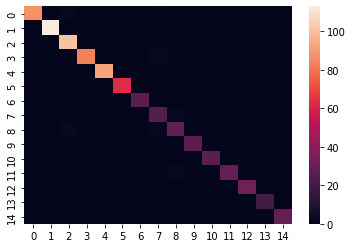

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(ytest,y_model),ax=ax)

In [ ]:
from joblib import dump, load
dump(model, 'silentSpellPrototipo.joblib') 

['silentSpellPrototipo.joblib']

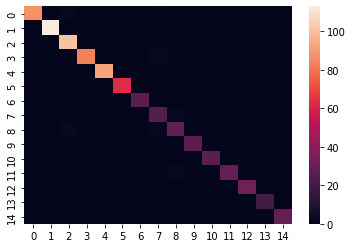

In [ ]:
clf = load('silentSpellPrototipo.joblib') 
y_model = model.predict(Xtest)           
ypred_train = model.predict(Xtrain)   
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(ytest,y_model),ax=ax)

In [ ]:
!pip install pyngrok --quiet
get_ipython().system_raw("mlflow ui --port 5000 &") # run tracking UI in the background


# create remote tunnel using ngrok.com to allow local port access
# borrowed from https://colab.research.google.com/github/alfozan/MLflow-GBRT-demo/blob/master/MLflow-GBRT-demo.ipynb#scrollTo=4h3bKHMYUIG6

from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = ""
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://126e-34-125-252-162.ngrok.io
